In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

In [6]:
url='https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'

In [7]:
od.download(url) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  anniml


Your Kaggle Key:

  ························


Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:01<00:00, 3.92MB/s]


In [8]:
##7dbd12d5f826d956e4b6c0f7 userid


In [9]:
import os
data_dir='/kaggle/working/weather-dataset-rattle-package'
os.listdir(data_dir)

['weatherAUS.csv']

In [10]:
train_df='/kaggle/working/weather-dataset-rattle-package/weatherAUS.csv'

In [11]:
train_df=pd.read_csv(train_df)

In [12]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**Find the numeric and categorical columns**

In [13]:
train_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
raw_df=train_df.copy()


In [16]:
train_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [18]:
raw_df=train_df.copy()

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [20]:
raw_df[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt

In [22]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [23]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
tp_location=raw_df.groupby('Location')['Rainfall'].sum().nlargest(10).index
top_10_location=raw_df[raw_df['Location'].isin(tp_location)]
top_10_location

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9058,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,NNE,54.0,N,...,51.0,58.0,1005.9,1002.3,1.0,5.0,26.5,28.4,No,No
9059,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,SSW,56.0,SSW,...,68.0,67.0,1010.9,1011.4,7.0,7.0,23.4,24.4,No,Yes
9060,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,SE,35.0,SE,...,70.0,59.0,1019.3,1018.8,8.0,7.0,21.7,23.7,Yes,No
9061,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,E,24.0,SSE,...,62.0,45.0,1019.5,1017.0,5.0,2.0,22.5,24.8,No,No
9062,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,NE,41.0,NW,...,54.0,62.0,1015.7,1012.7,1.0,6.0,24.6,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [25]:
px.histogram(top_10_location,x='Rainfall',y='Location',color='RainToday',title='Rainfall vs location')

In [26]:
raw_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [27]:
px.scatter(raw_df.sample(2000),x='MaxTemp',y='Rainfall',color='RainToday',title='Rainfall vs MaxTemp')

In [28]:
px.histogram(raw_df,x='RainToday',y='MaxTemp',color='RainTomorrow')

In [29]:
raw_df.Date

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145454    2017-06-20
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
Name: Date, Length: 140787, dtype: object

In [30]:
month=pd.to_datetime(raw_df.Date).dt.month

In [31]:
!pip install jovian --upgrade --quiet

In [32]:
import jovian

<IPython.core.display.Javascript object>

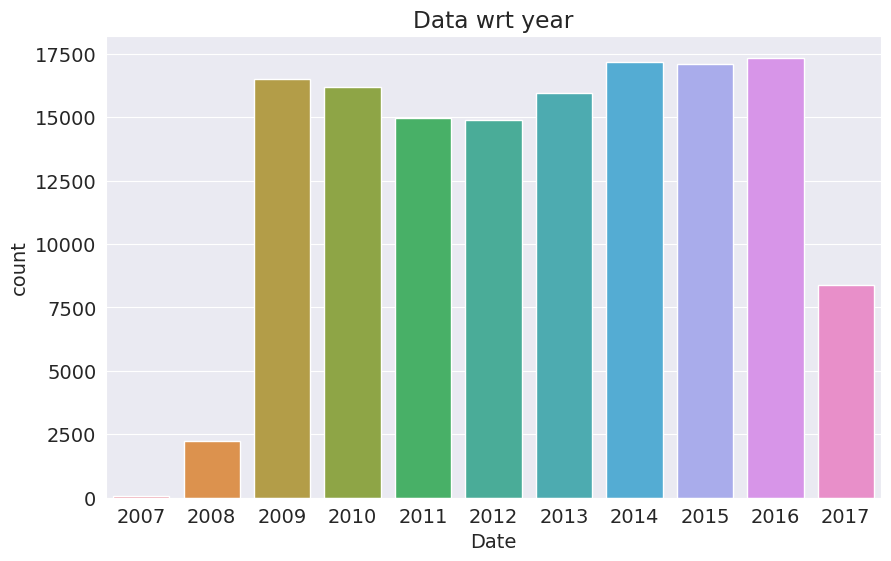

In [33]:
plt.title('Data wrt year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [34]:
year=pd.to_datetime(raw_df.Date).dt.year


In [35]:
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [36]:
train_df[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [37]:
print('tran_df shape',train_df.shape)
print('val_df shape',val_df.shape)
print('test_df shape',test_df.shape)

tran_df shape (97988, 23)
val_df shape (17089, 23)
test_df shape (25710, 23)


In [38]:
# Now need to check which features will be important for the model


In [39]:
raw_df.columns # since we have to ans that either it will rain tommorow or not for that no need of date column

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [40]:
inputs=list(raw_df.columns)[1:-1]
target='RainTomorrow'

In [41]:
print(inputs)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [42]:
raw_df[inputs]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


In [43]:
raw_df[target].value_counts()

RainTomorrow
No     109586
Yes     31201
Name: count, dtype: int64

In [44]:
train_inputs=train_df[inputs].copy()
train_target=train_df[target].copy()
val_inputs=val_df[inputs].copy()
val_target=val_df[target].copy()
test_inputs=test_df[inputs].copy()
test_target=test_df[target].copy()

In [45]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [46]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [47]:
val_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2133,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,W,...,11.0,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No
2134,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,ESE,...,9.0,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No
2135,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,N,...,20.0,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No
2136,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,W,...,7.0,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No
2137,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,SE,...,9.0,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,E,...,20.0,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No
144914,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,ESE,...,31.0,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No
144915,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,SE,...,22.0,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No
144916,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,SSE,...,17.0,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No


In [48]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()

In [49]:
len(numeric_cols)

16

In [50]:
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [51]:
len(categorical_cols)

5

In [52]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [53]:
nan=[col for col in train_inputs.columns if train_inputs[col].isna().sum() !=0]

In [54]:
nan

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [55]:
### IMPUTING MISSING NUMERIC DATA

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer = SimpleImputer(strategy='mean')

In [58]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [59]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [60]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [61]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [62]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [63]:
imp_list=[train_inputs[numeric_cols],val_inputs[numeric_cols],test_inputs[numeric_cols]]

In [64]:
for i in imp_list:
    print(i.isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64


In [65]:
## Scaling the numeric features


In [66]:
for l in imp_list:
     print(l.describe())

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean      12.008398     23.022609      2.372935      5.357666      7.617805   
std        6.337005      6.977735      8.518819      3.136123      2.913498   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      3.800000      7.500000   
50%       11.800000     22.400000      0.000000      5.472516      7.630540   
75%       16.600000     27.900000      0.800000      5.600000      9.200000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       40.198776     14.091355     18.763152     68.630871     51.469317   
std        13.212242      8.944051      8.823879

In [67]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [68]:
from sklearn.preprocessing  import MinMaxScaler

In [69]:
scaler=MinMaxScaler()

In [70]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [71]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [72]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [73]:
## Encoding categorical columns


In [74]:
raw_df[categorical_cols].isna().sum()

Location          0
WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
RainToday         0
dtype: int64

In [75]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [78]:
raw_df[categorical_cols].fillna('Unknown')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [79]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [80]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [81]:
encoded_col=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_col)
print(len(encoded_col))

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [82]:
train_inputs[encoded_col]=encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_col]=encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_col]=encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

/tmp/ipykernel_36/3265356560.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3265356560.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3265356560.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3265356560.py:1: PerformanceWarning:

Da

In [83]:
train_inputs[categorical_cols].isna().sum()

Location          0
WindGustDir    6868
WindDir9am     7019
WindDir3pm     1952
RainToday         0
dtype: int64

In [84]:
pd.set_option('display.max_columns',None)

In [85]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [86]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [87]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [88]:
print('train_inputs : ',train_inputs.shape)
print('train_targets : ',train_target.shape)
print('val_inputs : ',val_inputs.shape)
print('val_target : ',val_target.shape)
print('test_inputs : ',test_inputs.shape)
print('test_target : ',test_target.shape)

train_inputs :  (97988, 123)
train_targets :  (97988,)
val_inputs :  (17089, 123)
val_target :  (17089,)
test_inputs :  (25710, 123)
test_target :  (25710,)


In [89]:
!pip install pyarrow --quiet

In [90]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [91]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: user 35.2 ms, sys: 10.6 ms, total: 45.8 ms
Wall time: 43 ms


In [92]:
print('train_inputs : ',train_inputs.shape)
print('train_targets : ',train_target.shape)
print('val_inputs : ',val_inputs.shape)
print('val_target : ',val_target.shape)
print('test_inputs : ',test_inputs.shape)
print('test_target : ',test_target.shape)

train_inputs :  (97988, 123)
train_targets :  (97988,)
val_inputs :  (17089, 123)
val_target :  (17089,)
test_inputs :  (25710, 123)
test_target :  (25710,)


In [93]:
# Training Logistic Model

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model=LogisticRegression(solver='liblinear')

In [96]:
#model.fit(train_inputs,train_target)

In [97]:
print(train_inputs.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=123)


In [98]:
len(train_inputs[numeric_cols + encoded_col].columns)

118

In [99]:
[col for col in train_inputs.columns if col not in train_inputs[numeric_cols+encoded_col].columns ]

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [100]:
model.fit(train_inputs[numeric_cols + encoded_col],train_target)

LogisticRegression(solver='liblinear')

In [101]:
print(model.coef_.tolist())

[[0.8941494819914398, -2.8835981637598285, 3.16705385571896, 0.8748813625212737, -1.6712299421013947, 6.767350229914935, -0.9348274497098934, -1.4305423144580125, 0.32169035571609356, 5.998310719348589, 5.479442680901137, -9.193081641325355, -0.1617248603539462, 1.2877526299030033, 0.47427919277414954, 2.0306485635715577, 0.6006296229747108, -0.5482290695469623, 0.47582713818585737, 0.005403329094420832, 0.3448876907966021, -0.3541939045192693, 0.17792147945281966, 0.4398188899108637, -0.01537127061274263, 0.027474693408753546, 0.25694232549913004, -0.0218819867279193, -0.044852542203540485, -0.4845267257789648, -0.13899063231311373, -0.5770420446571881, -0.7889757132822478, -0.25772682848771616, -0.33014715004120004, -0.5704349639635146, 0.08010303171771241, 0.010434612808275893, 0.06303065657435758, -0.9041914913596089, -0.44254300410647857, 0.0036144590326460013, -0.46233657140847095, -0.4666993679113447, -0.0706491168142918, 0.1899331278715225, 0.4487399252051554, 0.606893959113903

In [102]:
print(model.intercept_)

[-2.51736667]


In [103]:
x_train=train_inputs[numeric_cols + encoded_col]
x_val=val_inputs[numeric_cols + encoded_col]
x_test=test_inputs[numeric_cols + encoded_col]

In [104]:
train_pred=model.predict(x_train)

In [105]:
type(train_pred)

numpy.ndarray

In [106]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [107]:
train_proba=model.predict_proba(x_train) 
train_proba

array([[0.94410402, 0.05589598],
       [0.94077867, 0.05922133],
       [0.96099488, 0.03900512],
       ...,
       [0.98747367, 0.01252633],
       [0.98331684, 0.01668316],
       [0.87429661, 0.12570339]])

In [108]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(train_pred,train_target)

0.8519716700004082

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(train_target,train_pred,normalize='true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

In [113]:
# 94 % time model predicted that there will be no rain that is actually True
#5 % time it predicted that there will be  rain but acctually there was rain
# 47 % it predicted there will be no rain but actually it rained
# 52 % it predicted that there will rain which is  true


In [114]:
def predict_def(inputs,target,name=''):
    preds=model.predict(inputs)
    accuracy=accuracy_score(preds,target)
    print('accuracy {:.2f}%'.format(accuracy*100))
    cf=confusion_matrix(target,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} confusion matrix'.format(name))
    return preds
    
    
    

accuracy 85.20%


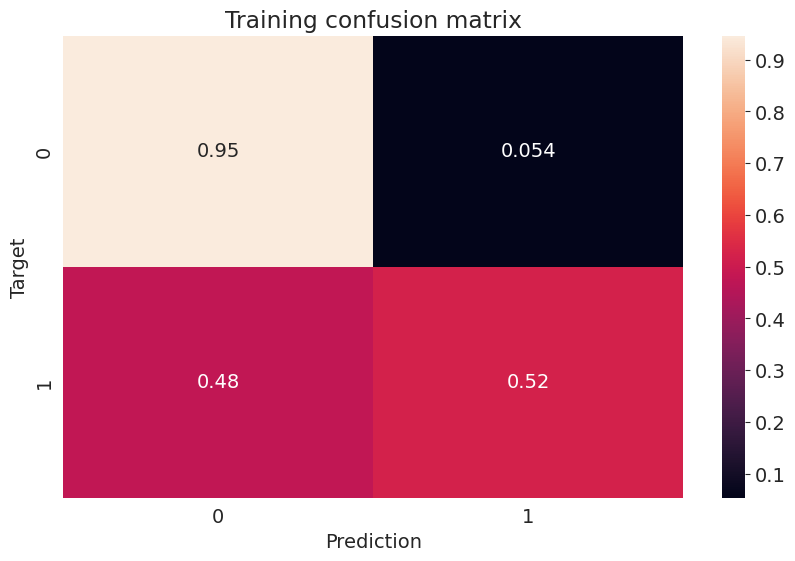

In [115]:
train_pred=predict_def(x_train,train_target,'Training')

accuracy 85.41%


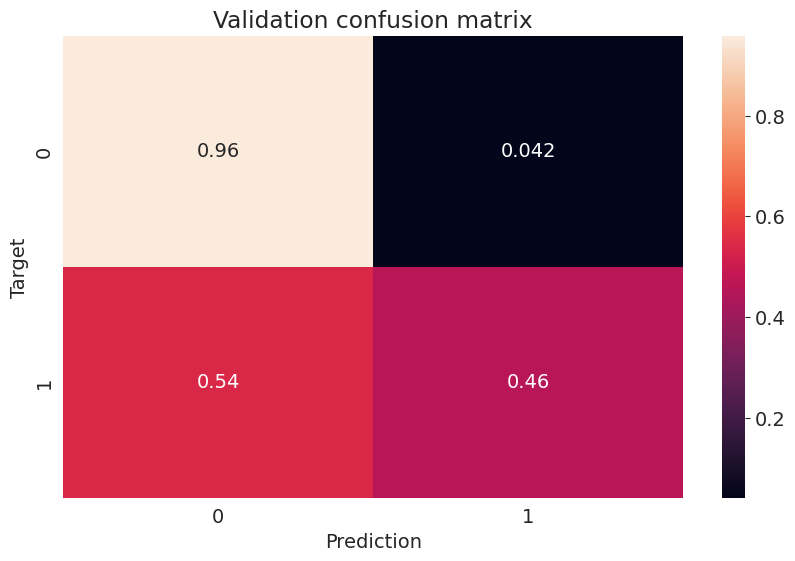

In [116]:
val_pred=predict_def(x_val,val_target,'Validation')

accuracy 84.20%


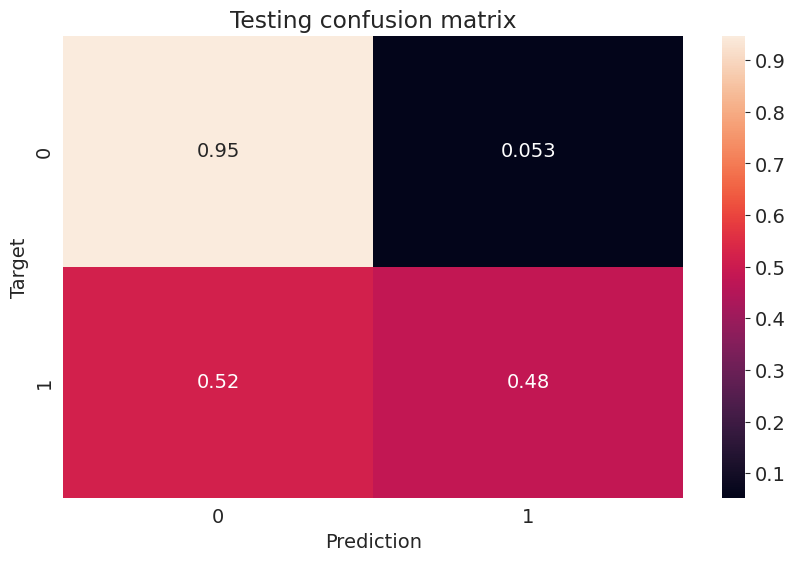

In [117]:
test_pred=predict_def(x_test,test_target,'Testing')
                      
                     

In [118]:
# now to verify you can verify your model with dumb model

In [119]:
def random_guess(inputs):
    return np.random.choice(['No','Yes'],len(inputs))


In [120]:
def pred_all_no(inputs):
    return np.full(len(inputs),'No')

In [121]:
accuracy_score(train_target,random_guess(x_train))

0.4981630403722905

In [122]:
accuracy_score(train_target,pred_all_no(x_train))

0.7775441890843777

In [123]:
base_model=accuracy_score(train_target,train_pred)
base_model='{:.2f}%'.format(base_model*100)

In [124]:
base_model

'85.20%'

#Train a logistic regression model using just the numeric columns from the dataset. Does it perform better or worse than the model trained above?

In [125]:
x_train_numeric_df=x_train[numeric_cols]

In [126]:
x_train_numeric_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658


In [127]:
numeric_model=LogisticRegression(solver='liblinear')

In [128]:
numeric_model.fit(x_train_numeric_df,train_target)

LogisticRegression(solver='liblinear')

In [129]:
numeric_pres=numeric_model.predict(x_train_numeric_df)

In [130]:
accuracy_score(train_target,numeric_pres)

0.8450116340776421

In [131]:
x_val_numeric_df=x_val[numeric_cols]

In [132]:
accuracy_dict={}
def Logistic_pred(inputs , target,name=""):
    model1=LogisticRegression(solver='liblinear')
    model1.fit(inputs, target)
    preds=model1.predict(inputs)
    accuracy=accuracy_score(target,preds)
    accuracy_dict[name]=(f'{accuracy*100:.2f}%')
    print(f'Accuracy score : {accuracy*100:.2f} %')
    cf=confusion_matrix(target,preds,normalize='true')
    
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    return plt.figure(),accuracy_dict
    

Accuracy score : 85.20 %


(<Figure size 1000x600 with 0 Axes>, {'x_train Pred': '85.20%'})

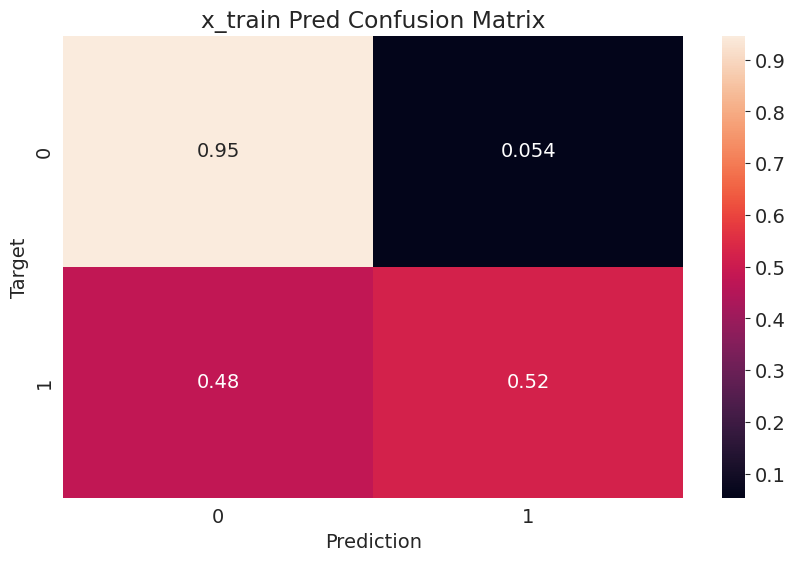

<Figure size 1000x600 with 0 Axes>

In [133]:
Logistic_pred(x_train,train_target,'x_train Pred')

Accuracy score : 85.51 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%', 'Val Pred': '85.51%'})

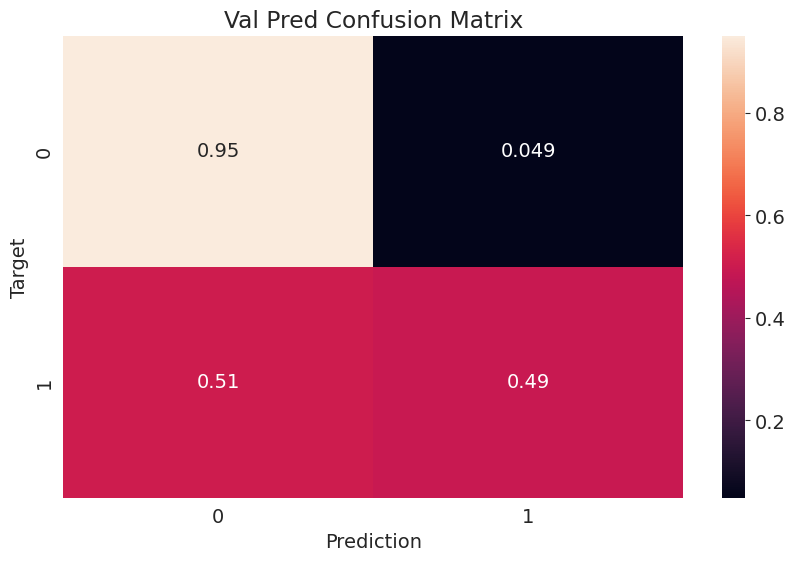

<Figure size 1000x600 with 0 Axes>

In [134]:
Logistic_pred(x_val,val_target,'Val Pred')

Accuracy score : 84.59 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%', 'Val Pred': '85.51%', 'Target Pred': '84.59%'})

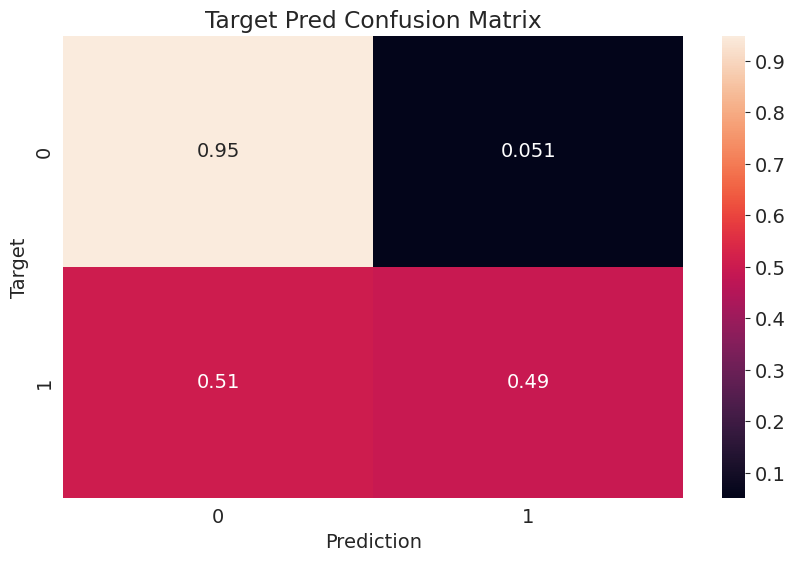

<Figure size 1000x600 with 0 Axes>

In [135]:
Logistic_pred(x_test,test_target,'Target Pred')

Accuracy score : 84.50 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%'})

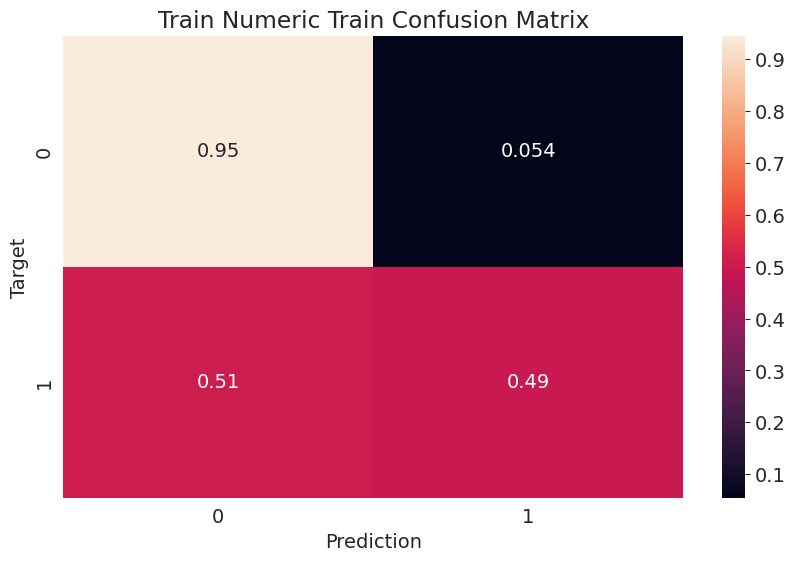

<Figure size 1000x600 with 0 Axes>

In [136]:
Logistic_pred(x_train_numeric_df,train_target,'Train Numeric Train')

Accuracy score : 84.49 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%',
  'Validation Numeric': '84.49%'})

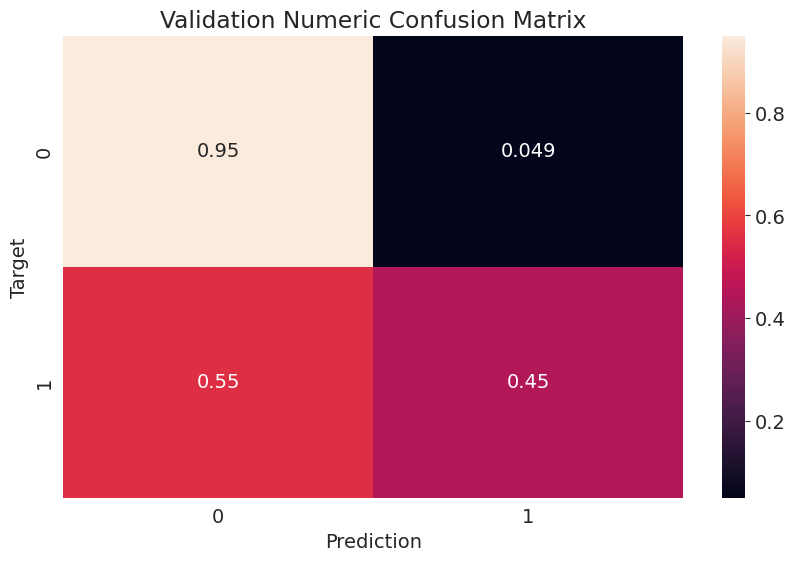

<Figure size 1000x600 with 0 Axes>

In [137]:
Logistic_pred(x_val_numeric_df,val_target,'Validation Numeric')

In [138]:
test_numeric_df=x_test[numeric_cols]

Accuracy score : 83.79 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%',
  'Validation Numeric': '84.49%',
  'Test Numeric Pred': '83.79%'})

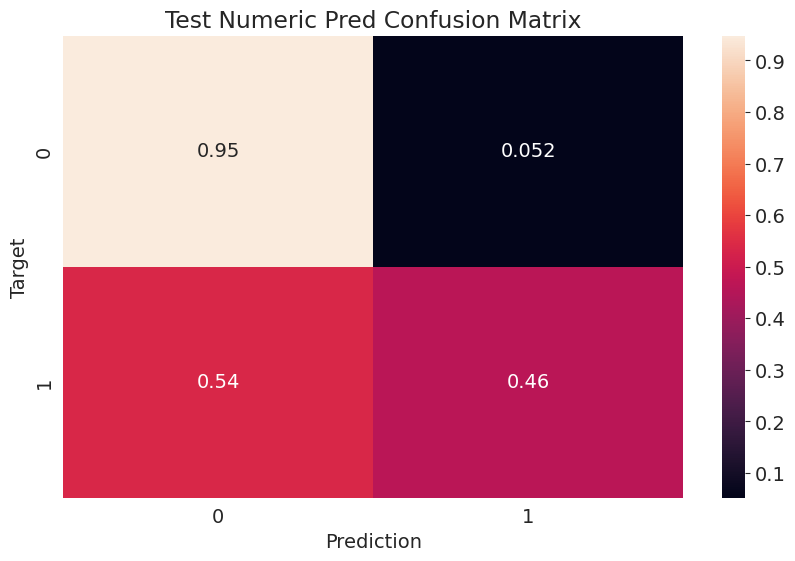

<Figure size 1000x600 with 0 Axes>

In [139]:
Logistic_pred(test_numeric_df,test_target,'Test Numeric Pred')

In [140]:
print(accuracy_dict)

{'x_train Pred': '85.20%', 'Val Pred': '85.51%', 'Target Pred': '84.59%', 'Train Numeric Train': '84.50%', 'Validation Numeric': '84.49%', 'Test Numeric Pred': '83.79%'}


In [141]:
x_train_categorical_df=x_train[encoded_col]

Accuracy score : 78.63 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%',
  'Validation Numeric': '84.49%',
  'Test Numeric Pred': '83.79%',
  'Train_categorical': '78.63%'})

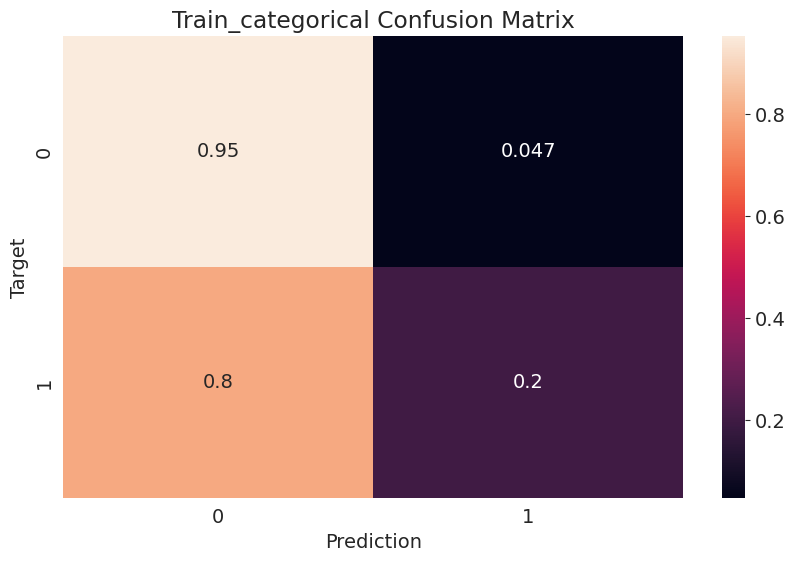

<Figure size 1000x600 with 0 Axes>

In [142]:
Logistic_pred(x_train_categorical_df,train_target,'Train_categorical')

In [143]:
val_categorical_df=x_val[encoded_col]

Accuracy score : 79.90 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%',
  'Validation Numeric': '84.49%',
  'Test Numeric Pred': '83.79%',
  'Train_categorical': '78.63%',
  'val_categorical': '79.90%'})

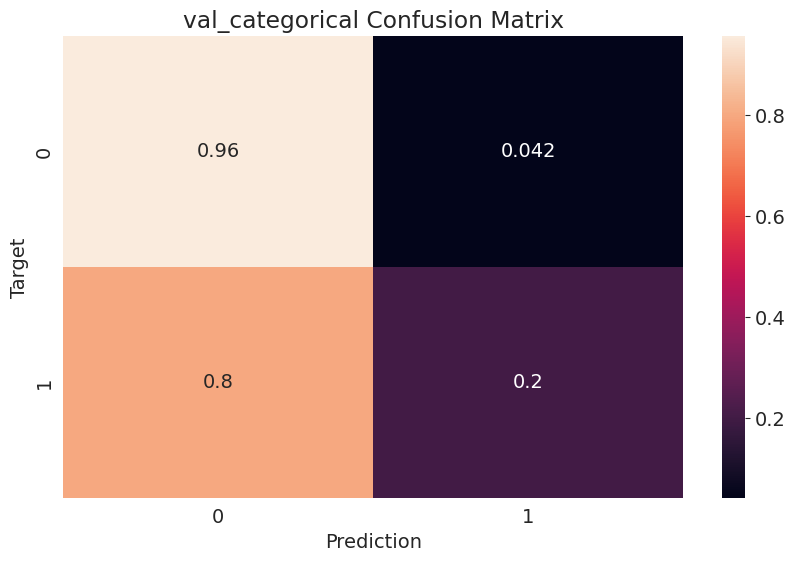

<Figure size 1000x600 with 0 Axes>

In [144]:
Logistic_pred(val_categorical_df,val_target,'val_categorical')

In [145]:
test_categorical_df=x_test[encoded_col]

Accuracy score : 78.20 %


(<Figure size 1000x600 with 0 Axes>,
 {'x_train Pred': '85.20%',
  'Val Pred': '85.51%',
  'Target Pred': '84.59%',
  'Train Numeric Train': '84.50%',
  'Validation Numeric': '84.49%',
  'Test Numeric Pred': '83.79%',
  'Train_categorical': '78.63%',
  'val_categorical': '79.90%',
  'Test Categorical Prediction': '78.20%'})

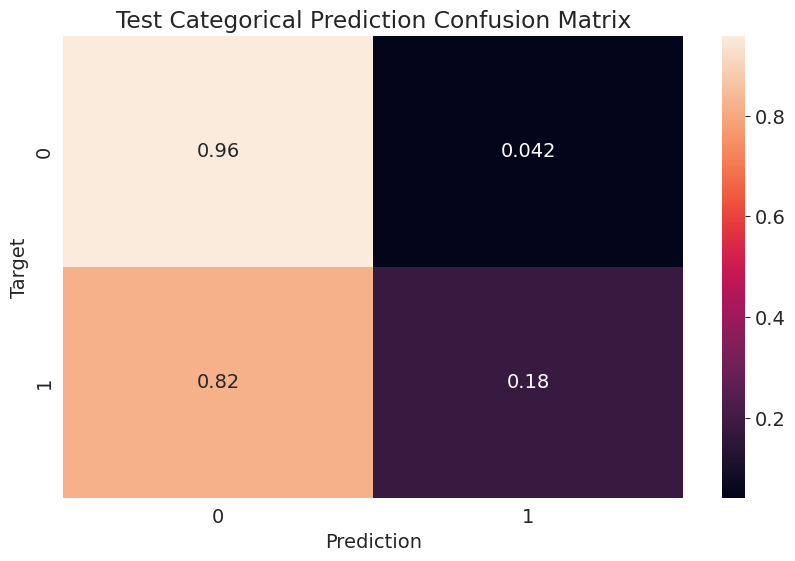

<Figure size 1000x600 with 0 Axes>

In [146]:
Logistic_pred(test_categorical_df,test_target,'Test Categorical Prediction')

In [147]:
Prediction_data=pd.DataFrame(list(accuracy_dict.items()),columns=['Model Name','Accuracy'])

In [148]:
accuracy_score(train_target,pred_all_no(x_train))

0.7775441890843777

In [149]:
accuracy_score(train_target,random_guess(x_train))

0.5000714373188554

In [150]:
Prediction_data=Prediction_data._append({'Model Name' : 'Always No','Accuracy':'77.75'},ignore_index=True)
Prediction_data=Prediction_data._append({'Model Name' : 'Random Guess','Accuracy':'49.93'},ignore_index=True)

In [151]:
Prediction_data

,Model Name,Accuracy
0,x_train Pred,85.20%
1,Val Pred,85.51%
2,Target Pred,84.59%
3,Train Numeric Train,84.50%
4,Validation Numeric,84.49%
5,Test Numeric Pred,83.79%
6,Train_categorical,78.63%
7,val_categorical,79.90%
8,Test Categorical Prediction,78.20%
9,Always No,77.75


In [152]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [153]:
new_input_df = pd.DataFrame([new_input])

In [154]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,NNE,13.0,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [155]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_col]=encoder.transform(new_input_df[categorical_cols])


/tmp/ipykernel_36/3751423066.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3751423066.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3751423066.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3751423066.py:3: PerformanceWarning:

Da

In [156]:
x_new_input=new_input_df[numeric_cols + encoded_col]

In [157]:
x_new_input.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [158]:
new_pred=model.predict(x_new_input)[0]

In [159]:
new_pred

'Yes'

In [173]:
def new_input_pred(single_input):
    single_input_df=pd.DataFrame([single_input])
    single_input_df[numeric_cols]=imputer.transform(single_input_df[numeric_cols])
    single_input_df[numeric_cols]=scaler.transform(single_input_df[numeric_cols])
    single_input_df[encoded_col]=encoder.transform(single_input_df[categorical_cols])
    x_new_input=single_input_df[numeric_cols+encoded_col]
    preds=model.predict(x_new_input)[0]
    prob = model.predict_proba(x_new_input)[0][list(model.classes_).index(preds)]
    return preds,prob

In [174]:
new_input_pred(new_input)

/tmp/ipykernel_36/3131076813.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3131076813.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3131076813.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_36/3131076813.py:5: PerformanceWarning:

Da

('Yes', 0.5190344743036921)

In [175]:
## Save the model
import joblib

In [186]:
australia_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': inputs,
    'target_col': target,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_col
}

In [187]:
joblib.dump(australia_rain,'australia_rain.joblib')

['australia_rain.joblib']